# Graph-Sparse Logistic Regression Precision / Recall Curve

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (17, 8)

import pickle
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

# File was serialized like so: 
#   logit_pr_results = [(pathway_id, scores, classifier.coef_, classifier.Cs_), ...]
#   pickle.dump(results, open('logit_pr_results.pickle', 'wb'))

Populating the interactive namespace from numpy and matplotlib


## I. Extract Data

### i. Load data

In [2]:
nodes = pd.read_csv(repo_path + 'experiments/generated_data/4/hsa04110_inbiomap_exp.csv', index_col=0).columns

In [3]:
pathways_df = pd.read_pickle(KEGG_path)

pathways = {pathway_id: set(pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0]) for pathway_id in pathways_df.index.get_level_values(2)}

In [4]:
results = ( pd.read_pickle("gslr_gmm_pr_results_0_9.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_10_19.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_20_29.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_30_39.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_40_49.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_50_59.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_60_69.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_70_79.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_80_89.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_90_99.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_100_109.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_110_119.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_120_129.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_130_139.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_140_149.pickle") +
            pd.read_pickle("gslr_gmm_pr_results_150_159.pickle") )

### ii. Define Precision and Recall

In [5]:
def recall(truth, pred):    
    return len(truth & pred) / float(len(truth))
    
def precision(truth, pred):
    if len(pred) == 0: return float(0)
    return len(truth & pred) / float(len(pred))

### iii. Retrieve Scores, Precisions, and Recalls for every pathway for every fold for every sparsity

In [6]:
scores = pd.DataFrame({(pathway_id, sparsity): {'fold_'+str(i): fold_score for i, fold_score in enumerate(scores)} for pathway_id, sparsity, scores, features in results}).transpose()
scores.head()

fold_0  fold_1  fold_2  fold_3  fold_4  fold_5  fold_6  \
hsa00970 (0, 100)       0.80    0.55    0.70    0.80    0.75    0.70    1.00   
         (50, 200)      0.95    0.95    0.95    0.80    1.00    0.80    1.00   
         (150, 300)     0.90    1.00    0.95    0.95    1.00    0.95    0.90   
         (250, 500)     0.90    1.00    0.95    0.95    1.00    0.95    0.85   
         (500, 1500)    0.80    0.90    0.85    0.90    0.95    0.90    0.90   

                      fold_7  fold_8  fold_9  
hsa00970 (0, 100)       0.85     0.8    0.80  
         (50, 200)      1.00     0.9    1.00  
         (150, 300)     1.00     1.0    0.95  
         (250, 500)     0.80     1.0    0.90  
         (500, 1500)    0.70     0.9    0.85

In [7]:
recalls = pd.DataFrame({(pathway_id, sparsity): {'fold_'+str(i): recall(set(pathways[pathway_id]), set(featureset)) for i, featureset in enumerate(featuresets)} for pathway_id, sparsity, scores, featuresets in results if len(pathways[pathway_id]) > 0}).transpose()
recalls.head()

fold_0    fold_1    fold_2    fold_3    fold_4  \
hsa00970 (0, 100)     0.015152  0.015152  0.015152  0.015152  0.015152   
         (50, 200)    0.530303  0.484848  0.500000  0.469697  0.454545   
         (150, 300)   0.606061  0.606061  0.606061  0.606061  0.606061   
         (250, 500)   0.606061  0.606061  0.606061  0.606061  0.606061   
         (500, 1500)  0.621212  0.621212  0.621212  0.606061  0.621212   

                        fold_5    fold_6    fold_7    fold_8    fold_9  
hsa00970 (0, 100)     0.015152  0.015152  0.015152  0.015152  0.015152  
         (50, 200)    0.484848  0.530303  0.439394  0.484848  0.515152  
         (150, 300)   0.606061  0.606061  0.575758  0.606061  0.606061  
         (250, 500)   0.606061  0.606061  0.606061  0.606061  0.606061  
         (500, 1500)  0.621212  0.621212  0.621212  0.621212  0.621212

In [8]:
precisions = pd.DataFrame({(pathway_id, sparsity): {'fold_'+str(i): precision(set(pathways[pathway_id]), set(featureset)) for i, featureset in enumerate(featuresets)} for pathway_id, sparsity, scores, featuresets in results}).transpose()
precisions.head()

fold_0    fold_1    fold_2    fold_3    fold_4  \
hsa00970 (0, 100)     1.000000  1.000000  1.000000  1.000000  1.000000   
         (50, 200)    0.614035  0.551724  0.634615  0.645833  0.576923   
         (150, 300)   0.246914  0.272109  0.245399  0.246914  0.263158   
         (250, 500)   0.161290  0.159363  0.155642  0.158730  0.156863   
         (500, 1500)  0.082828  0.081673  0.082164  0.079523  0.079922   

                        fold_5    fold_6    fold_7    fold_8    fold_9  
hsa00970 (0, 100)     1.000000  1.000000  1.000000  1.000000  1.000000  
         (50, 200)    0.666667  0.714286  0.453125  0.666667  0.693878  
         (150, 300)   0.266667  0.270270  0.260274  0.256410  0.236686  
         (250, 500)   0.156863  0.155642  0.159363  0.151515  0.160643  
         (500, 1500)  0.082329  0.079457  0.081836  0.083333  0.082164

In [9]:
recalls = recalls.stack().unstack(level=1)
precisions = precisions.stack().unstack(level=1)
recalls.head()

(0, 100)  (50, 200)  (150, 300)  (250, 500)  (500, 1500)
hsa00970 fold_0  0.015152   0.530303    0.606061    0.606061     0.621212
         fold_1  0.015152   0.484848    0.606061    0.606061     0.621212
         fold_2  0.015152   0.500000    0.606061    0.606061     0.621212
         fold_3  0.015152   0.469697    0.606061    0.606061     0.606061
         fold_4  0.015152   0.454545    0.606061    0.606061     0.621212

(0.0, 1.05)

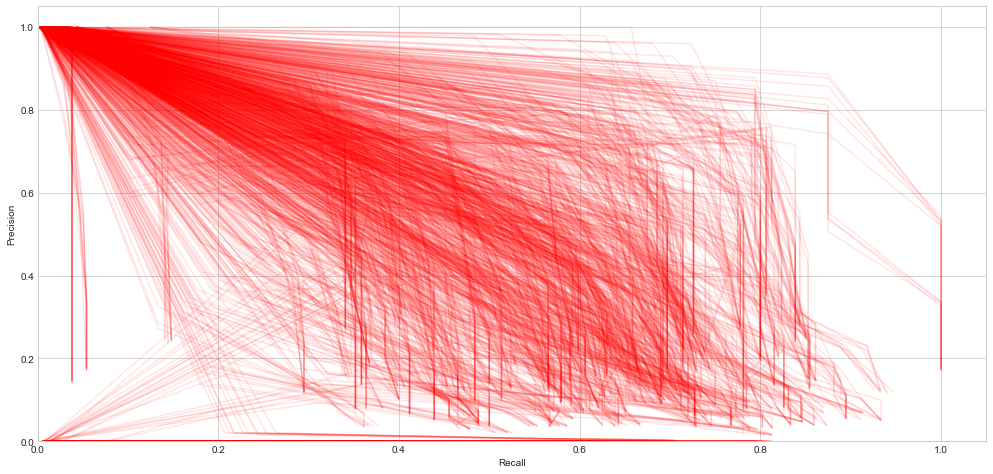

In [13]:
[plt.plot(recalls.iloc[k].values, precisions.iloc[k].values, c='r', alpha=0.1) for k in range(len(recalls))]

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])